## Energy saved from recycling
<p>Did you know that recycling saves energy by reducing or eliminating the need to make materials from scratch? For example, aluminum can manufacturers can skip the energy-costly process of producing aluminum from ore by cleaning and melting recycled cans. Aluminum is classified as a non-ferrous metal.</p>
<p>Singapore has an ambitious goal of becoming a zero-waste nation. The amount of waste disposed of in Singapore has increased seven-fold over the last 40 years. At this rate, Semakau Landfill, Singapore’s only landfill, will run out of space by 2035. Making matters worse, Singapore has limited land for building new incineration plants or landfills.</p>
<p>The government would like to motivate citizens by sharing the total energy that the combined recycling efforts have saved every year. They have asked you to help them.</p>
<p>You have been provided with three datasets. The data come from different teams, so the names of waste types may differ.</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:16px"><b>datasets/wastestats.csv - Recycling statistics per waste type for the period 2003 to 2017</b>
    </div>
    <div>Source: <a href="https://www.nea.gov.sg/our-services/waste-management/waste-statistics-and-overall-recycling">Singapore National Environment Agency</a></div>
<ul>
    <li><b>waste_type: </b>The type of waste recycled.</li>
    <li><b>waste_disposed_of_tonne: </b>The amount of waste that could not be recycled (in metric tonnes).</li>
    <li><b>total_waste_recycle_tonne: </b>The amount of waste that could be recycled (in metric tonnes).</li>
    <li><b>total_waste_generated: </b>The total amount of waste collected before recycling (in metric tonnes).</li>
    <li><b>recycling_rate: </b>The amount of waste recycled per tonne of waste generated.</li>
    <li><b>year: </b>The recycling year.</li>
</ul>
    </div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6; margin-top: 17px;">
    <div style="font-size:16px"><b>datasets/2018_2019_waste.csv - Recycling statistics per waste type for the period 2018 to 2019</b>
    </div>
    <div> Source: <a href="https://www.nea.gov.sg/our-services/waste-management/waste-statistics-and-overall-recycling">Singapore National Environment Agency</a></div>
<ul>
    <li><b>Waste Type: </b>The type of waste recycled.</li>
    <li><b>Total Generated: </b>The total amount of waste collected before recycling (in thousands of metric tonnes).</li> 
    <li><b>Total Recycled: </b>The amount of waste that could be recycled. (in thousands of metric tonnes).</li>
    <li><b>Year: </b>The recycling year.</li>
</ul>
    </div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6; margin-top: 17px;">
    <div style="font-size:16px"><b>datasets/energy_saved.csv -  Estimations of the amount of energy saved per waste type in kWh</b>
    </div>
<ul>
    <li><b>material: </b>The type of waste recycled.</li>
    <li><b>energy_saved: </b>An estimate of the energy saved (in kiloWatt hour) by recycling a metric tonne of waste.</li> 
    <li><b>crude_oil_saved: </b>An estimate of the number of barrels of oil saved by recycling a metric tonne of waste.</li>
</ul>

</div>
<pre><code>
</code></pre>

In [1]:
import numpy as np

In [2]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
waste_stats = pd.read_csv('datasets/wastestats.csv', usecols=[0,2,5])
waste_data_18_19 = pd.read_csv('datasets/2018_2019_waste.csv', usecols=[0,2,3])


In [3]:
energy_saved = pd.read_csv('datasets/energy_saved.csv')

In [4]:
waste_stats.head()

,waste_type,total_waste_recycled_tonne,year
0,Food,111100.0,2016
1,Paper/Cardboard,607100.0,2016
2,Plastics,59500.0,2016
3,C&D,1585700.0,2016
4,Horticultural waste,209000.0,2016


In [5]:
cols_needed= ['waste_type','total_waste_recycled_tonne','year']

In [6]:
waste_data_18_19.head()

,Waste Type,Total Recycled ('000 tonnes),Year
0,Construction& Demolition,1434,2019
1,Ferrous Metal,1270,2019
2,Paper/Cardboard,449,2019
3,Plastics,37,2019
4,Food,136,2019


In [7]:
cols_change = waste_data_18_19.columns.values

In [8]:
mapping = dict(zip(cols_change, cols_needed))
mapping

{'Waste Type': 'waste_type',
 "Total Recycled ('000 tonnes)": 'total_waste_recycled_tonne',
 'Year': 'year'}

In [9]:
waste_data_18_19.rename(columns=mapping, inplace=True)

In [10]:
waste_data_18_19.head()

,waste_type,total_waste_recycled_tonne,year
0,Construction& Demolition,1434,2019
1,Ferrous Metal,1270,2019
2,Paper/Cardboard,449,2019
3,Plastics,37,2019
4,Food,136,2019


In [11]:
waste_data_18_19['total_waste_recycled_tonne'] = waste_data_18_19.total_waste_recycled_tonne*1000

In [12]:
waste_stats_all = waste_stats.append(waste_data_18_19)

In [13]:
waste_stats_all.isna().sum()

waste_type                    0
total_waste_recycled_tonne    0
year                          0
dtype: int64

In [14]:
waste_stats_all['waste_type'] = waste_stats_all['waste_type'].astype('category')

In [15]:
energy_saved.head()

,The table gives the amount of energy saved in kilowatt hour (kWh) and the amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram) per waste type,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1 barrel oil is approximately 159 litres of oil,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,material,Plastic,Glass,Ferrous Metal,Non-Ferrous Metal,Paper
3,energy_saved,5774 Kwh,42 Kwh,642 Kwh,14000 Kwh,4000 kWh
4,crude_oil saved,16 barrels,NaN,1.8 barrels,40 barrels,1.7 barrels


In [16]:
materials = energy_saved.iloc[2, 1:-1].values
materials

array(['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal'],
      dtype=object)

In [17]:
waste_stats_all[waste_stats_all['waste_type'].isin(materials)].head()

,waste_type,total_waste_recycled_tonne,year
10,Glass,14700.0,2016
25,Glass,14600.0,2015
40,Glass,15700.0,2014
51,Ferrous Metal,1369200.0,2013
55,Glass,14600.0,2013


In [18]:
waste_stats_all.waste_type.unique()

['Food', 'Paper/Cardboard', 'Plastics', 'C&D', 'Horticultural waste', ..., 'Construction& Demolition', 'Horticultural', 'Non-Ferrous Metal', 'Others (stones, ceramic, rubber, ect)', 'Overall']
Length: 37
Categories (37, object): ['Ash & Sludge', 'Ash and sludge', 'C&D', 'Construction Debris', ..., 'Used Slag', 'Used slag', 'Wood', 'Wood/Timber']

In [19]:
waste_stats_all['waste_type']=waste_stats_all['waste_type'].apply(lambda x:x.lower().title())

In [20]:
waste_stats_all.waste_type.unique()

array(['Food', 'Paper/Cardboard', 'Plastics', 'C&D',
       'Horticultural Waste', 'Wood', 'Ferrous Metal',
       'Non-Ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass',
       'Textile/Leather', 'Scrap Tyres',
       'Others (Stones, Ceramics & Rubber Etc.)', 'Total',
       'Others (Stones, Ceramics & Rubber Etc)', 'Food Waste',
       'Construction Debris', 'Wood/Timber', 'Non-Ferrous Metals',
       'Sludge', 'Ferrous Metals', 'Others', 'Ash And Sludge', 'Plastic',
       'Others (Stones, Ceramic, Rubber, Etc.)',
       'Construction& Demolition', 'Horticultural',
       'Others (Stones, Ceramic, Rubber, Ect)', 'Overall'], dtype=object)

In [21]:
name_changes = {
    'Plastics':'Plastic',
    'Ferrous Metals':'Ferrous Metal',
    'Non-Ferrous Metals':'Non-Ferrous Metal'
}

In [22]:
waste_stats_all['waste_type']=waste_stats_all.waste_type.replace(name_changes)

In [23]:
waste_stats_all.waste_type.unique()

array(['Food', 'Paper/Cardboard', 'Plastic', 'C&D', 'Horticultural Waste',
       'Wood', 'Ferrous Metal', 'Non-Ferrous Metal', 'Used Slag',
       'Ash & Sludge', 'Glass', 'Textile/Leather', 'Scrap Tyres',
       'Others (Stones, Ceramics & Rubber Etc.)', 'Total',
       'Others (Stones, Ceramics & Rubber Etc)', 'Food Waste',
       'Construction Debris', 'Wood/Timber', 'Sludge', 'Others',
       'Ash And Sludge', 'Others (Stones, Ceramic, Rubber, Etc.)',
       'Construction& Demolition', 'Horticultural',
       'Others (Stones, Ceramic, Rubber, Ect)', 'Overall'], dtype=object)

In [24]:
energy_values = energy_saved.iloc[3, 1:-1].values
energy_values

array(['5774 Kwh', '42 Kwh', '642 Kwh', '14000 Kwh'], dtype=object)

In [25]:
l = []
for x in energy_values:
    l.append(x[:-4])
    
l

['5774', '42', '642', '14000']

In [26]:
energy_savings = pd.DataFrame({'material': materials,'energy_saved_tonne':l })
energy_savings

,material,energy_saved_tonne
0,Plastic,5774
1,Glass,42
2,Ferrous Metal,642
3,Non-Ferrous Metal,14000


In [27]:
recycle_energy = waste_stats_all.merge(energy_savings, how='right', left_on='waste_type', right_on='material')

In [28]:
recycle_energy.head()

,waste_type,total_waste_recycled_tonne,year,material,energy_saved_tonne
0,Plastic,59500.0,2016,Plastic,5774
1,Plastic,57800.0,2015,Plastic,5774
2,Plastic,80000.0,2014,Plastic,5774
3,Plastic,91100.0,2013,Plastic,5774
4,Plastic,82100.0,2012,Plastic,5774


In [29]:
recycle_energy['energy_saved_tonne'] = recycle_energy['energy_saved_tonne'].astype('int')

In [30]:
years_needed = list(range(2015, 2020))
recycle_energy = recycle_energy[recycle_energy.year.isin(years_needed)]
recycle_energy.year.unique()

array([2016, 2015, 2017, 2019, 2018])

In [31]:
recycle_energy.sort_values('year', inplace=True)
recycle_energy.head()

,waste_type,total_waste_recycled_tonne,year,material,energy_saved_tonne
1,Plastic,57800.0,2015,Plastic,5774
52,Non-Ferrous Metal,160400.0,2015,Non-Ferrous Metal,14000
18,Glass,14600.0,2015,Glass,42
35,Ferrous Metal,1333300.0,2015,Ferrous Metal,642
0,Plastic,59500.0,2016,Plastic,5774


In [32]:
recycle_energy['energy_saved_total'] = recycle_energy.total_waste_recycled_tonne * recycle_energy.energy_saved_tonne

In [33]:
recycle_energy.head()

,waste_type,total_waste_recycled_tonne,year,material,energy_saved_tonne,energy_saved_total
1,Plastic,57800.0,2015,Plastic,5774,3.337372e+08
52,Non-Ferrous Metal,160400.0,2015,Non-Ferrous Metal,14000,2.245600e+09
18,Glass,14600.0,2015,Glass,42,6.132000e+05
35,Ferrous Metal,1333300.0,2015,Ferrous Metal,642,8.559786e+08
0,Plastic,59500.0,2016,Plastic,5774,3.435530e+08


In [34]:
recycle_energy.energy_saved_tonne.unique()

array([ 5774, 14000,    42,   642])

In [35]:
recycle_energy.dtypes

waste_type                     object
total_waste_recycled_tonne    float64
year                            int64
material                       object
energy_saved_tonne              int64
energy_saved_total            float64
dtype: object

In [36]:
total_year = recycle_energy.groupby('year')['energy_saved_total'].sum().values

In [37]:
total_year

array([3.4359290e+09, 2.5544334e+09, 2.4705960e+09, 2.6981300e+09,
       2.7654400e+09])

In [38]:
annual_energy_savings = pd.DataFrame({'year':years_needed,'total_energy_saved': total_year})
annual_energy_savings.set_index('year', inplace=True)

In [39]:
annual_energy_savings

,total_energy_saved
year,
2015,3.435929e+09
2016,2.554433e+09
2017,2.470596e+09
2018,2.698130e+09
2019,2.765440e+09


### Visualisation of Recycling from 2015 to 2019

In [40]:
import matplotlib.pyplot as plt

In [41]:
plt.style.use('ggplot')

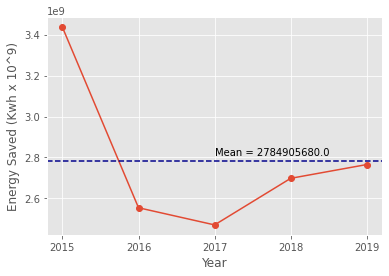

In [95]:
plt.plot(annual_energy_savings, marker='o')
plt.xticks(years_needed)
plt.xlabel('Year')
plt.ylabel('Energy Saved (Kwh x 10^9)')
mean_savings = annual_energy_savings.mean().to_numpy()[0]
line=plt.axhline(mean_savings, linestyle='--', color='darkblue')
plt.annotate(f'Mean = {mean_savings}', (2017, annual_energy_savings.mean()*1.01))
plt.show()

### How was recycling in 2015?

In [43]:
recycle_energy_2015 = recycle_energy[recycle_energy.year==2015]

In [44]:
recycle_energy_2015

,waste_type,total_waste_recycled_tonne,year,material,energy_saved_tonne,energy_saved_total
1,Plastic,57800.0,2015,Plastic,5774,3.337372e+08
52,Non-Ferrous Metal,160400.0,2015,Non-Ferrous Metal,14000,2.245600e+09
18,Glass,14600.0,2015,Glass,42,6.132000e+05
35,Ferrous Metal,1333300.0,2015,Ferrous Metal,642,8.559786e+08


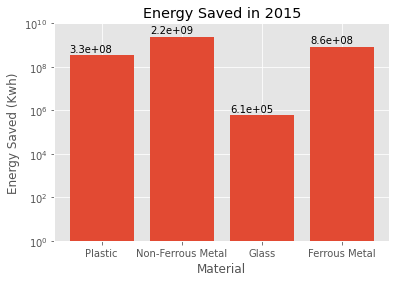

In [49]:
barr = plt.bar(recycle_energy_2015.waste_type, recycle_energy_2015.energy_saved_total)
plt.yscale('log')
plt.ylim(1,10**10)
plt.xlabel('Material')
plt.ylabel('Energy Saved (Kwh)')
plt.title('Energy Saved in 2015')
for bar in barr.patches:
    plt.annotate(f'{bar.get_height():.1e}', (bar.get_x(),bar.get_height()**1.02))
plt.show()